#Resumos e Simulações

##**CAPÍTULO 5**

###A série discreta de Fourier

Sabe-se que uma sequência periódica pode ser definida por:

𝑥̃(𝑛)= 𝑥̃(𝑛+𝑘𝑁),∀𝑛,𝑘

Sendo N o periódo fundamental da sequência. As sequências periodicas também podem ser expressas como:

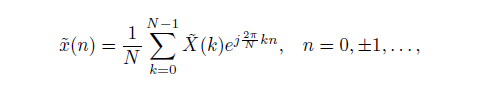

onde {𝑥̃(k), k=0 ±0, 1,...,} são chamados de coeficiente discreto da serie de Fourier, que é definido por:

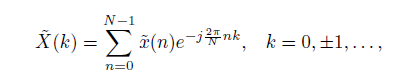

Essas duas equações juntas são chamadas e representam a série discreta de Fourier. Observando se também que pode se utilizar para denotar a sua inversa (IDFS).

Sendo image.png o exponencial complexo, então temos:

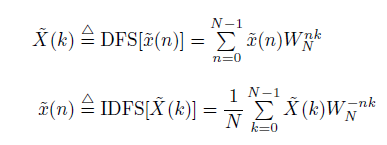

###A transformada discreta de Fourier

A série discreta de Fourier possibilita que a transformada de Fourier em tempo discreto seja calculada numericamente. A transformada discreta de Fourier (DFT) e sua inversa (IDFT) podem ser dadas como sendo:

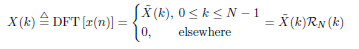

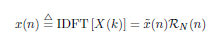



####Propriedades da transformada discreta de Fourier



**Linearidade:** O DFT é uma tranformada linear.

image.png

Nota-se que, se x1(n) e x2(n) tem diferentes durações, isso é, elas são sequências de ponto N1 e ponto N2, então escolhe-se N3 = max(N1, N2) e procede tendo o ponto N3.

**Circular folding:** Se uma sequência de ponto N é dobrado, então o resultado x(-n) pode não ser uma sequência de ponto N, e isso não seria possível para computar seu DFT. Portanto, usamos a operação de módulo N no argumento (n), define-se o folding por:

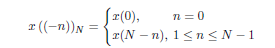
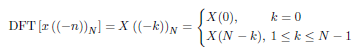

**Conjugação:** Semelhante ao anterior, temos que introduzir o circular folding no domínio da frequência.



image.png

**Propriedades de simetria para sequências reais:**

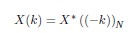

Essa simetria é chamada de simetria conjugada circular. Implicando ainda
que:
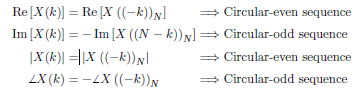

**Deslocamento circular de uma sequência:** Se uma sequência de pontos N é deslocada em qualquer direção, então o resultado não está mais entre 0 ≤ n ≤ N − 1.

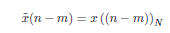
image.png
image.png

**Deslocamento circular no domínio da frequência:** Esta propriedade é dupla
da propriedade anterior definida por:

image.png

**Convolução circular:** Uma convolução linear entre dois sequências de pontos N
resultarão em uma sequência mais longa. Mais uma vez temos que
restringir nosso intervalo a 0 ≤ n ≤ N − 1. Portanto, em vez de deslocamento linear, devemos considerar o deslocamento circular.

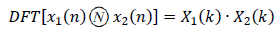

**Multiplicação:** Esse é o dual da propriedade de convolução circular. Dado por:

image.png

**Relação de Parseval:** Essa relação calcula a energia no dominio da frequência.

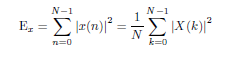

####**Convolução Linear usando o DTF**

O DTF é uma abordagem para implementação de operações linear de sistemas no dominio da frequência. Sendo assim, uma das operaçoes mais importantes. Apesar dessa operação resultar em uma convolução circular, é possível utilizá-la para resolver problemas desse tipo.

Em uma visão geral, a convolução circular é uma versão com alias da convolução linear.

#### **A transformada rápida de Fourier**

Apesar da tranformada descreta de Fourier ser um método computável, a sua implementação não é muito eficiente, em especial se a entrada for muito grande.

O número de cálculos da DFT para uma sequência de tamanho N, depende quadraticamente de N, isso que dizer que sua complexidade pode ser descrita por:

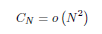

Quanto maior o N, o(N²) na pratica, é inaceitável.

Porém, a dependência quadrática de N pode ser reduzida quando se nota que a maioria dos cálculos podem ser eliminados, pela propriedade da periodicidade e da simetria.

Um desses exemplos é o algoritmo de dizimação no tempo (DIT-FFT) e decimação em frequência (DIF-FFT), que requerem operações de complexidade 𝐶𝑁=𝑜(𝑁 log 𝑁).

###SIMULAÇÕES

####**SIMULAÇÃO 5.1**


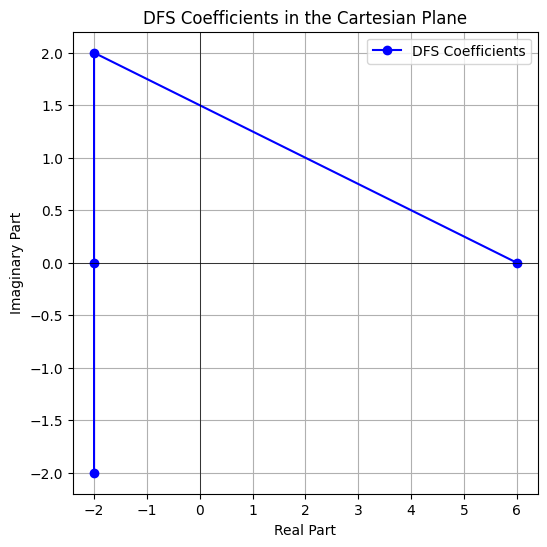

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def dfs(xn, N):
    """
    Computes Discrete Fourier Series Coefficients

    Parameters:
    xn (numpy array): One period of periodic signal over 0 <= n <= N-1
    N (int): Fundamental period of xn

    Returns:
    Xk (numpy array): DFS coefficients array over 0 <= k <= N-1
    """
    n = np.arange(N)  # row vector for n
    k = np.arange(N)  # row vector for k

    WN = np.exp(-1j * 2 * np.pi / N)  # Wn factor

    nk = np.outer(n, k)  # creates an N by N matrix of nk values
    WNnk = WN ** nk  # DFS matrix

    Xk = np.dot(xn, WNnk)  # row vector for DFS coefficients

    return Xk

# Exemplo de uso
xn = np.array([0, 1, 2, 3])  # Signal (xn)
N = 4  # Fundamental period
Xk = dfs(xn, N)  # Compute DFS coefficients

# Plotting DFS coefficients in the Cartesian plane (real vs imaginary)
plt.figure(figsize=(6, 6))
plt.plot(np.real(Xk), np.imag(Xk), 'bo-', label='DFS Coefficients')  # Plot real vs imaginary parts
plt.title("DFS Coefficients in the Cartesian Plane")
plt.xlabel("Real Part")
plt.ylabel("Imaginary Part")
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()


Função dfs:


```
function [Xk] = dfs(xn,N)

% Computes Discrete Fourier Series Coefficients

% ---------------------------------------------

% [Xk] = dfs(xn,N)

% Xk = DFS coeff. array over 0 <= k <= N-1

% xn = One period of periodic signal over 0 <= n <= N-1

%  N = Fundamental period of xn

%

n = [0:1:N-1];                       % row vector for n

k = [0:1:N-1];                       % row vecor for k

WN = exp(-j*2*pi/N);                 % Wn factor

nk = n'*k;                           % creates a N by N matrix of nk values

WNnk = WN .^ nk;                     % DFS matrix

Xk = xn * WNnk;                      % row vector for DFS coefficients
```



```
xn = [0,1,2,3]; N = 4; Xk = dfs(xn,N)
Xk =

  Columns 1 through 3

   6.0000 + 0.0000i  -2.0000 + 2.0000i  -2.0000 - 0.0000i

  Column 4

  -2.0000 - 2.0000i
```



####**SIMULAÇÃO 5.2**

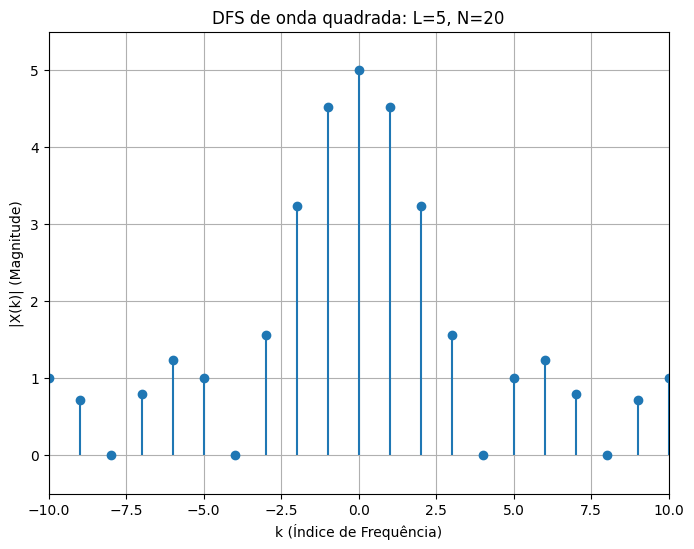

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def dfs(xn, N):
    """
    Computes Discrete Fourier Series Coefficients

    Parameters:
    xn (numpy array): One period of periodic signal over 0 <= n <= N-1
    N (int): Fundamental period of xn

    Returns:
    Xk (numpy array): DFS coefficients array over 0 <= k <= N-1
    """
    n = np.arange(N)  # Vetor para n
    k = np.arange(N)  # Vetor para k
    WN = np.exp(-1j * 2 * np.pi / N)  # Fator WN
    nk = np.outer(n, k)  # Produto externo entre n e k
    WNnk = WN ** nk  # Matriz WN ^ nk
    Xk = np.dot(xn, WNnk)  # Coeficientes DFS
    return Xk

# Parâmetros
L = 5   # Duração do pulso quadrado
N = 20  # Período fundamental
k = np.arange(-N//2, N//2 + 1)  # Índices k variando de -N/2 até N/2

# Sinal de entrada: pulso quadrado
xn = np.concatenate((np.ones(L), np.zeros(N - L)))  # [1, 1, ..., 0, 0]

# Cálculo da DFS
Xk = dfs(xn, N)

# Rearranjo para centralizar os componentes espectrais
magXk = np.abs(np.concatenate((Xk[N//2:], Xk[:N//2+1])))  # Rearranjar magnitude

# Plotando o gráfico no plano cartesiano
plt.figure(figsize=(8, 6))
plt.stem(k, magXk, basefmt=" ")  # Removido 'use_line_collection'
plt.title("DFS de onda quadrada: L=5, N=20")
plt.xlabel("k (Índice de Frequência)")
plt.ylabel("|X(k)| (Magnitude)")
plt.grid(True)
plt.axis([-N//2, N//2, -0.5, 5.5])  # Limites dos eixos X e Y
plt.show()


```
L = 5; N = 20; k = [-N/2:N/2]; % parametros de onda sq

xn = [ones(1,L), zeros(1,N-L)]; % onda Sq x(n)

Xk = dfs(xn,N); % DFS

magXk = abs([Xk(N/2+1:N) Xk(1:N/2+1)]); % magnitude DFS

subplot(2,2,1); stem(k,magXk); axis([-N/2,N/2,-0.5,5.5])

xlabel("k"); ylabel("Xtilde(k)")

title("DFS of SQ. onda: L=5, N=20")
```

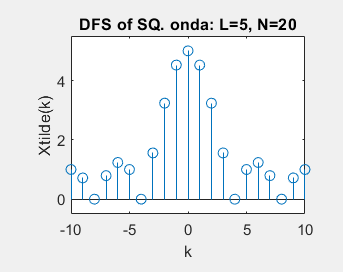

####**SIMULAÇÃO 5.5**


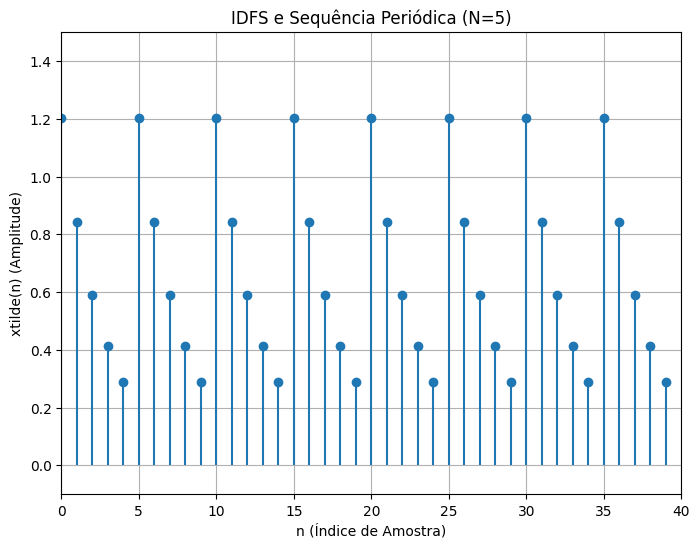

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def idfs(Xk, N):
    """
    Computes Inverse Discrete Fourier Series (IDFS)

    Parameters:
    Xk (numpy array): DFS coefficient array over 0 <= k <= N-1
    N (int): Fundamental period of Xk

    Returns:
    xn (numpy array): One period of periodic signal over 0 <= n <= N-1
    """
    n = np.arange(N)  # Vetor de índices n
    k = np.arange(N)  # Vetor de índices k

    WN = np.exp(-1j * 2 * np.pi / N)  # Fator WN
    nk = np.outer(n, k)  # Matriz de índices nk

    WNnk = WN ** (-nk)  # Matriz IDFS
    xn = np.dot(Xk, WNnk) / N  # Cálculo da IDFS
    return xn

# Parâmetros
N = 5  # Período fundamental
k = np.arange(0, N)  # Índices k
wk = 2 * np.pi * k / N  # Frequências discretas
zk = np.exp(1j * wk)  # Valores amostrados de z

# Cálculo da DFS como amostras de X(z)
Xk = zk / (zk - 0.7)

# Cálculo da IDFS
xn = np.real(idfs(Xk, N))  # Apenas a parte real da IDFS

# Sequência periódica xtilde
xtilde = np.tile(xn, 8)  # Repete a sequência IDFS para formar uma periódica

# Plotando no plano cartesiano X (n) e Y (amplitude)
plt.figure(figsize=(8, 6))
plt.stem(np.arange(0, 40), xtilde, basefmt=" ")  # Removido 'use_line_collection'
plt.title("IDFS e Sequência Periódica (N=5)")
plt.xlabel("n (Índice de Amostra)")
plt.ylabel("xtilde(n) (Amplitude)")
plt.axis([0, 40, -0.1, 1.5])  # Limites do gráfico
plt.grid(True)
plt.show()


Função idfs:


```
function [xn] = idfs(Xk,N)

% Computes Inverse Discrete Fourier Series

% ----------------------------------------

% [xn] = idfs(Xk,N)

% xn = One period of periodic signal over 0 <= n <= N-1

% Xk = DFS coeff. array over 0 <= k <= N-1

%  N = Fundamental period of Xk

%

n = [0:1:N-1];                       % row vector for n

k = [0:1:N-1];                       % row vecor for k

WN = exp(-j*2*pi/N);                 % Wn factor

nk = n'*k;                           % creates a N by N matrix of nk values

WNnk = WN .^ (-nk);                  % IDFS matrix

xn = (Xk * WNnk)/N;                  % row vector for IDFS values
```



```
N = 5; k = 0:1:N-1; % index da amostra
wk = 2*pi*k/N; zk = exp(j*wk); % amostra de z
Xk = (zk)./(zk-0.7); % DFS como amostras de X(z)
xn = real(idfs(Xk,N)); % IDFS
xtilde = xn'* ones(1,8); xtilde = (xtilde(:))'; % sequencia periodica
subplot(2,2,1); stem(0:39,xtilde);axis([0,40,-0.1,1.5])
xlabel("n"); ylabel("xtilde(n)"); title("N=5")
```
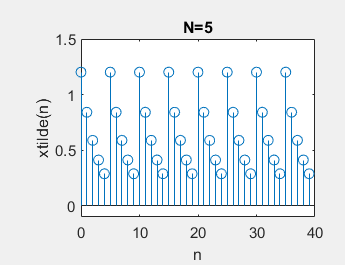


####**SIMULAÇÃO 5.6**

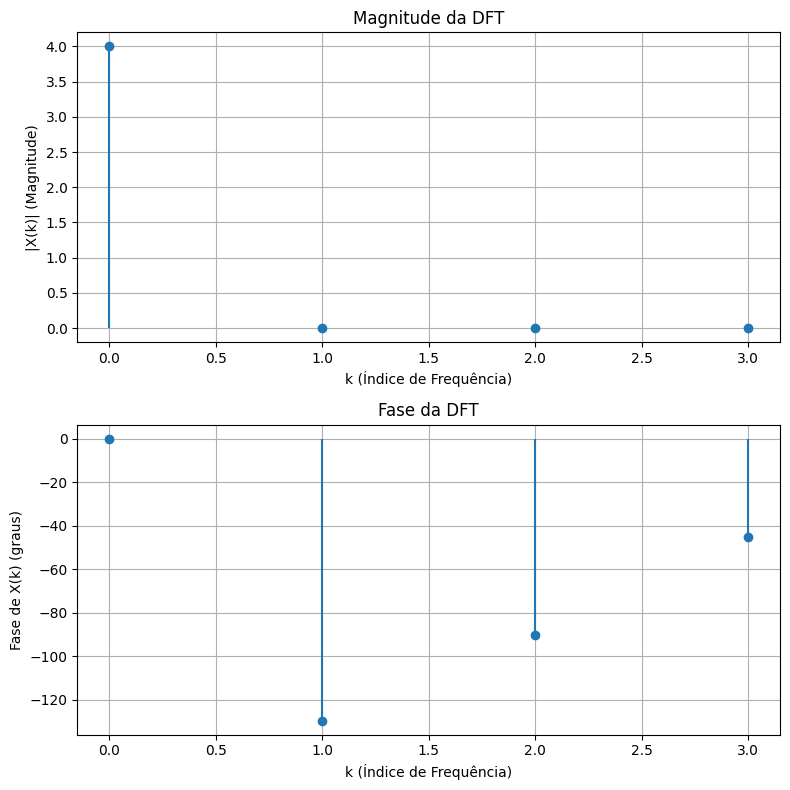

Magnitude: [4.00000000e+00 2.88181196e-16 2.44929360e-16 4.68193479e-16]
Fase (graus): [   0.         -129.60088047  -90.          -45.34790438]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def dft(xn, N):
    """
    Computes Discrete Fourier Transform (DFT)

    Parameters:
    xn (numpy array): N-point finite-duration sequence
    N (int): Length of the DFT

    Returns:
    Xk (numpy array): DFT coefficient array over 0 <= k <= N-1
    """
    n = np.arange(N)  # Índices n
    k = np.arange(N)  # Índices k

    WN = np.exp(-1j * 2 * np.pi / N)  # Fator WN
    nk = np.outer(n, k)  # Cria a matriz N x N de valores nk

    WNnk = WN ** nk  # Matriz DFT
    Xk = np.dot(xn, WNnk)  # Coeficientes da DFT
    return Xk

# Parâmetros
x = np.array([1, 1, 1, 1])  # Sequência de entrada
N = 4  # Comprimento da DFT

# Cálculo da DFT
X = dft(x, N)

# Cálculo da magnitude e fase
magX = np.abs(X)
phaX = np.angle(X) * 180 / np.pi  # Fase em graus

# Plotando a magnitude e fase no plano cartesiano
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Gráfico da magnitude
axs[0].stem(np.arange(N), magX, basefmt=" ")
axs[0].set_title("Magnitude da DFT")
axs[0].set_xlabel("k (Índice de Frequência)")
axs[0].set_ylabel("|X(k)| (Magnitude)")
axs[0].grid(True)

# Gráfico da fase
axs[1].stem(np.arange(N), phaX, basefmt=" ")
axs[1].set_title("Fase da DFT")
axs[1].set_xlabel("k (Índice de Frequência)")
axs[1].set_ylabel("Fase de X(k) (graus)")
axs[1].grid(True)

plt.tight_layout()
plt.show()

# Exibindo os resultados da magnitude e fase
print("Magnitude:", magX)
print("Fase (graus):", phaX)


Função dft:


```
function [Xk] = dft(xn,N)

% Computes Discrete Fourier Transform

% -----------------------------------

% [Xk] = dft(xn,N)

% Xk = DFT coeff. array over 0 <= k <= N-1

% xn = N-point finite-duration sequence

%  N = Length of DFT

%

n = [0:1:N-1];                       % row vector for n

k = [0:1:N-1];                       % row vecor for k

WN = exp(-j*2*pi/N);                 % Wn factor

nk = n'*k;                           % creates a N by N matrix of nk values

WNnk = WN .^ nk;                     % DFT matrix

Xk = xn * WNnk;                      % row vector for DFT coefficients
```


```
x = [1,1,1,1]; N = 4; X = dft(x,N);
magX = abs(X), phaX = angle(X)*180/pi
magX =

    4.0000    0.0000    0.0000    0.0000


phaX =

     0  -135   -90   -45
```



####**SIMULAÇÃO 5.8**


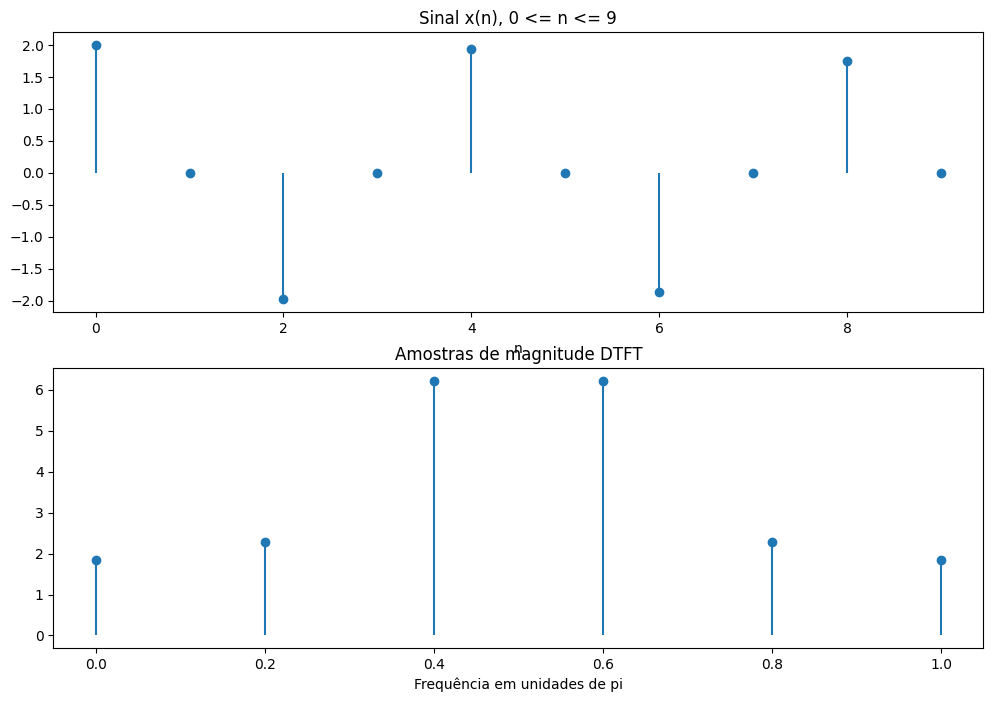

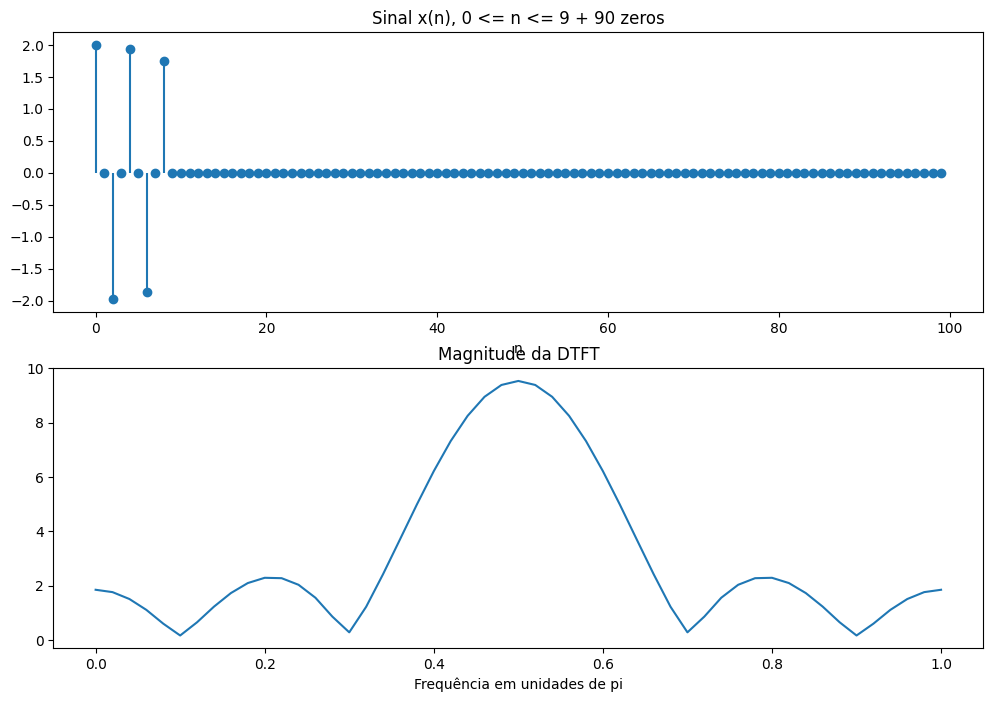

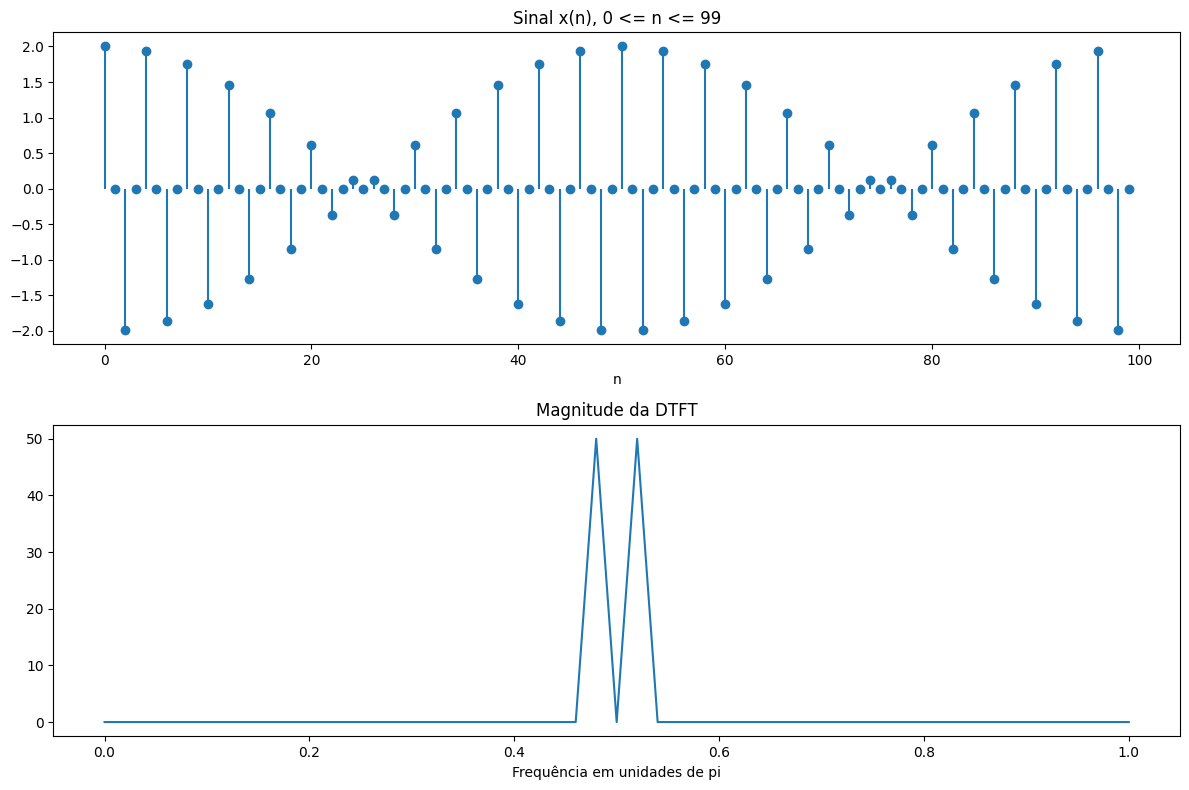

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def dft(xn, N):
    """
    Computes Discrete Fourier Transform (DFT)

    Parameters:
    xn (numpy array): N-point finite-duration sequence
    N (int): Length of the DFT

    Returns:
    Xk (numpy array): DFT coefficient array over 0 <= k <= N-1
    """
    n = np.arange(N)  # Índices n
    k = np.arange(N)  # Índices k

    WN = np.exp(-1j * 2 * np.pi / N)  # Fator WN
    nk = np.outer(n, k)  # Cria a matriz N x N de valores nk

    WNnk = WN ** nk  # Matriz DFT
    Xk = np.dot(xn, WNnk)  # Coeficientes da DFT
    return Xk

# Sinal x(n) definido
n = np.arange(100)
x = np.cos(0.48 * np.pi * n) + np.cos(0.52 * np.pi * n)

# Primeira sequência y1 de 10 amostras
n1 = np.arange(10)
y1 = x[:10]

# Gráfico 1: sinal x(n) para 0 <= n <= 9
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem(n1, y1, basefmt=" ")  # Removido 'use_line_collection'
plt.title("Sinal x(n), 0 <= n <= 9")
plt.xlabel("n")

# DFT de y1
Y1 = dft(y1, 10)
magY1 = np.abs(Y1[:6])
k1 = np.arange(6)
w1 = 2 * np.pi / 10 * k1

# Gráfico 2: Magnitude da DTFT para as amostras
plt.subplot(2, 1, 2)
plt.stem(w1 / np.pi, magY1, basefmt=" ")  # Removido 'use_line_collection'
plt.title("Amostras de magnitude DTFT")
plt.xlabel("Frequência em unidades de pi")

# Segunda sequência y2 com zeros após as primeiras 10 amostras
y2 = np.concatenate([x[:10], np.zeros(90)])

# Gráfico 3: sinal x(n) com 90 zeros
plt.figure(figsize=(12, 8))
n2 = np.arange(100)
plt.subplot(2, 1, 1)
plt.stem(n2, y2, basefmt=" ")  # Removido 'use_line_collection'
plt.title("Sinal x(n), 0 <= n <= 9 + 90 zeros")
plt.xlabel("n")

# DFT de y2
Y2 = dft(y2, 100)
magY2 = np.abs(Y2[:51])
k2 = np.arange(51)
w2 = 2 * np.pi / 100 * k2

# Gráfico 4: Magnitude da DTFT para y2
plt.subplot(2, 1, 2)
plt.plot(w2 / np.pi, magY2)
plt.title("Magnitude da DTFT")
plt.xlabel("Frequência em unidades de pi")

# Gráfico final: sinal x(n) original
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.stem(n, x, basefmt=" ")  # Removido 'use_line_collection'
plt.title("Sinal x(n), 0 <= n <= 99")
plt.xlabel("n")

# DFT do sinal x(n) original
X = dft(x, 100)
magX = np.abs(X[:51])
k = np.arange(51)
w = 2 * np.pi / 100 * k

# Gráfico final: Magnitude da DTFT de x(n)
plt.subplot(2, 1, 2)
plt.plot(w / np.pi, magX)
plt.title("Magnitude da DTFT")
plt.xlabel("Frequência em unidades de pi")

# Exibindo todos os gráficos
plt.tight_layout()
plt.show()


```
n = [0:1:99]; x = cos(0.48*pi*n)+cos(0.52*pi*n);
n1 = [0:1:9] ;y1 = x(1:1:10);
subplot(2,1,1) ;stem(n1,y1); title("signal x(n), 0 <= n <= 9");xlabel("n")
Y1 = dft(y1,10); magY1 = abs(Y1(1:1:6));
k1 = 0:1:5 ;w1 = 2*pi/10*k1;
subplot(2,1,2);stem(w1/pi,magY1);title("Amostras de magnitude DTFT");
xlabel("Frenquência em unidade de pi")
n2 = [0:1:99]; y2 = [x(1:1:10) zeros(1,90)];
subplot(2,1,1) ;stem(n2,y2) ;title("sinal x(n), 0 <= n <= 9 + 90 zeros");
xlabel("n")
Y2 =dft(y2,100); magY2 = abs(Y2(1:1:51));
k2 = 0:1:50; w2 = 2*pi/100*k2;
subplot(2,1,2); plot(w2/pi,magY2); title("DTFT Magnitude");
xlabel("Frequência por unidade de pi")
```

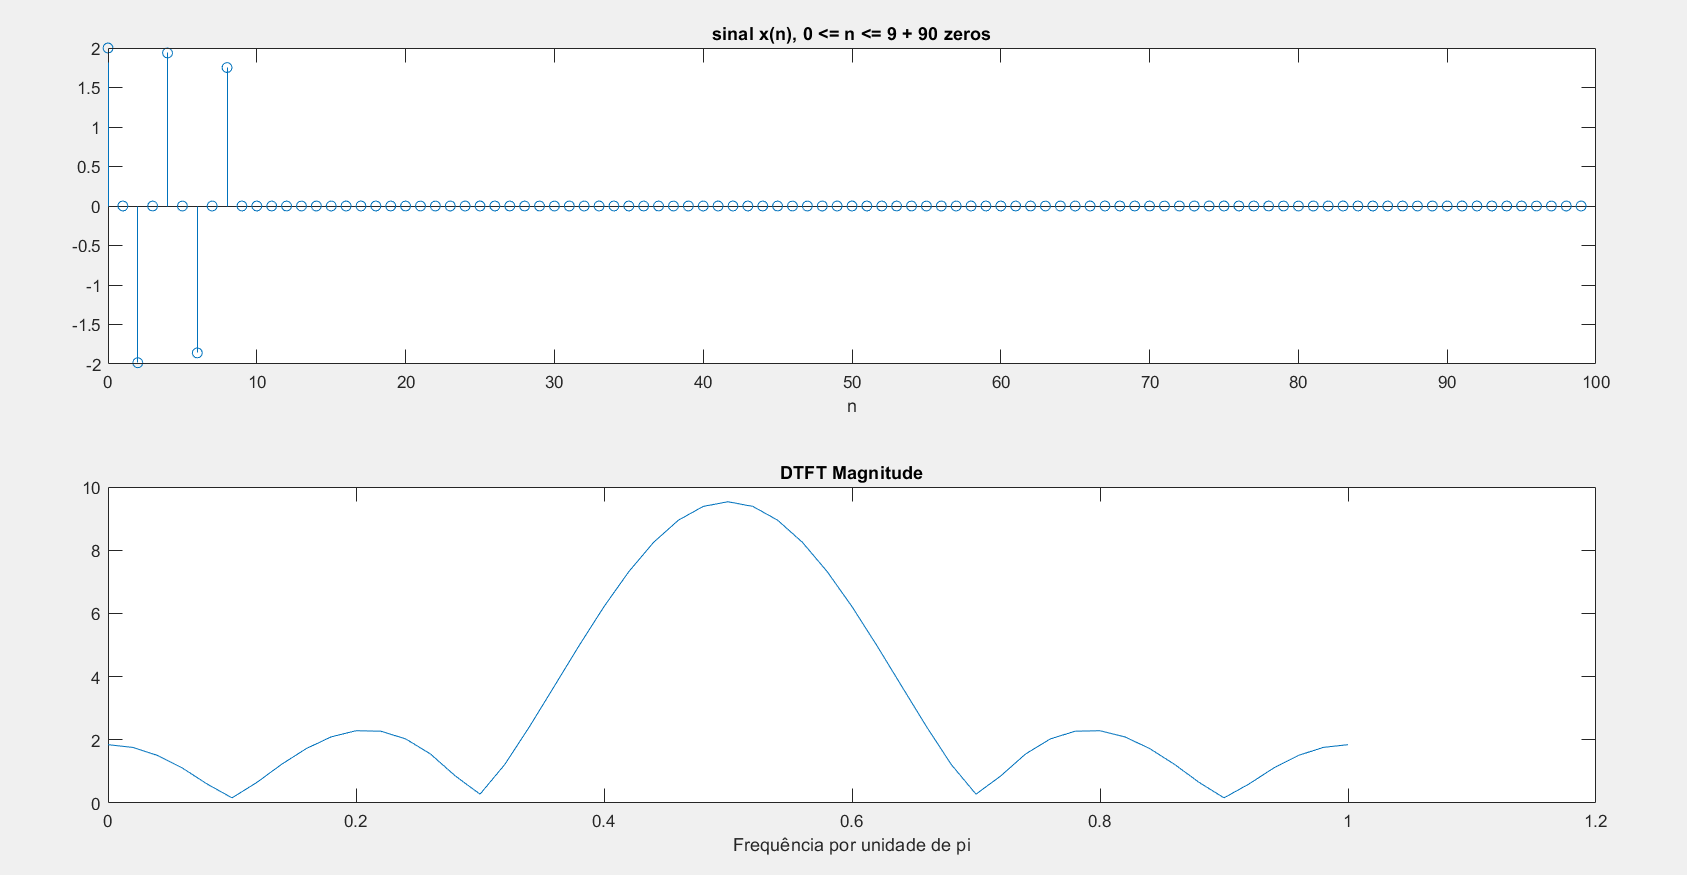



```
subplot(2,1,1); stem(n,x);
title("sinal x(n), 0 <= n <= 99"); xlabel("n")
X = dft(x,100); magX = abs(X(1:1:51));
k = 0:1:50; w = 2*pi/100*k;
subplot(2,1,2); plot(w/pi,magX); title("DTFT Magnitude");
xlabel("Frequência em unidades de pi")
```
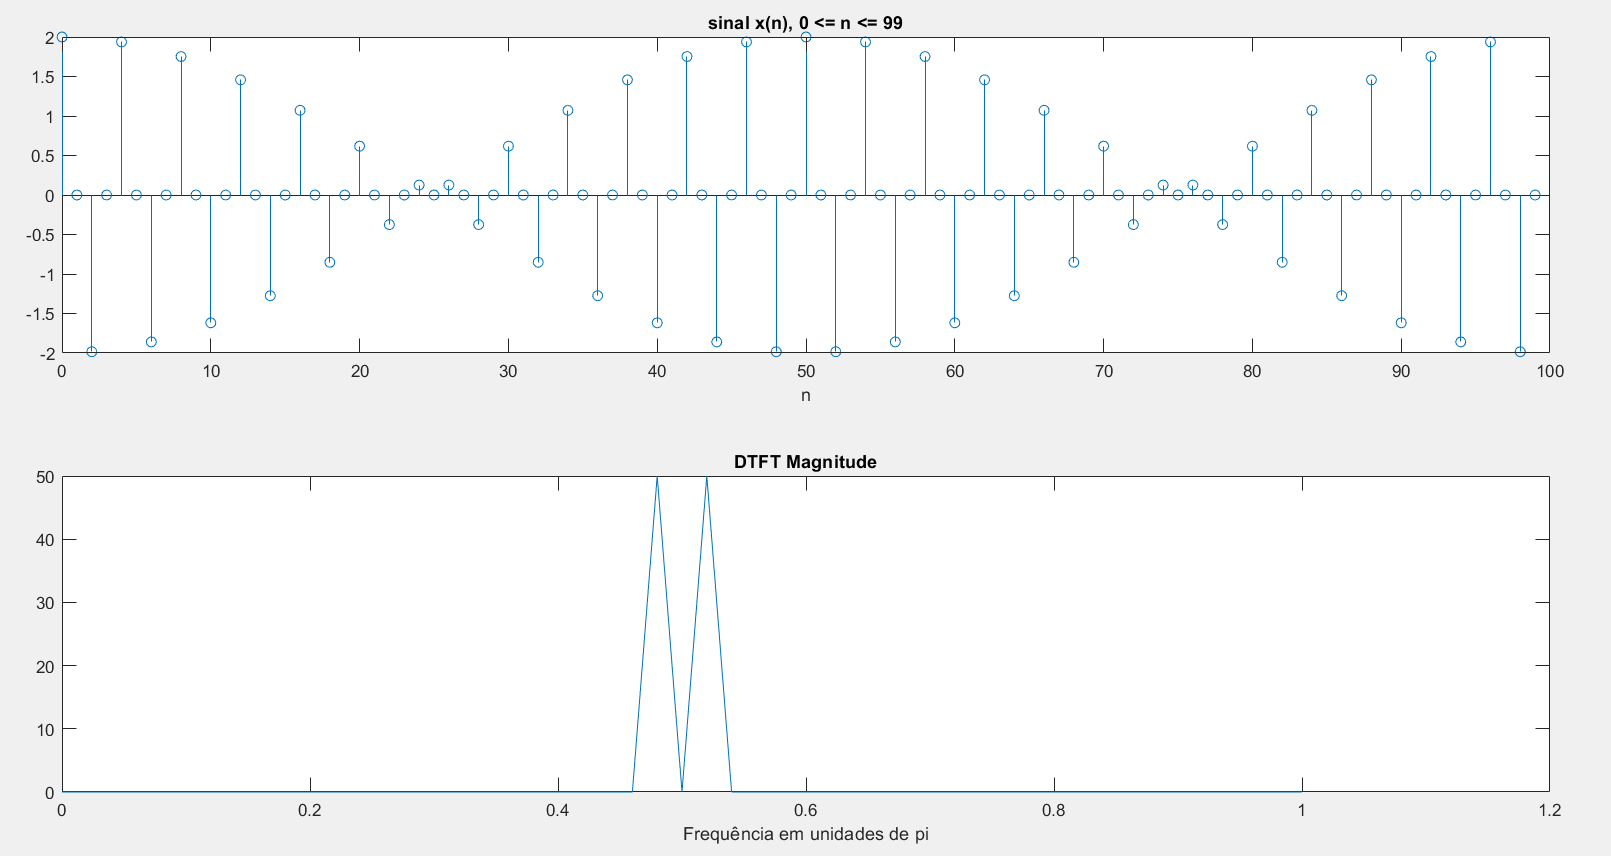


####**SIMULAÇÃO 5.9**

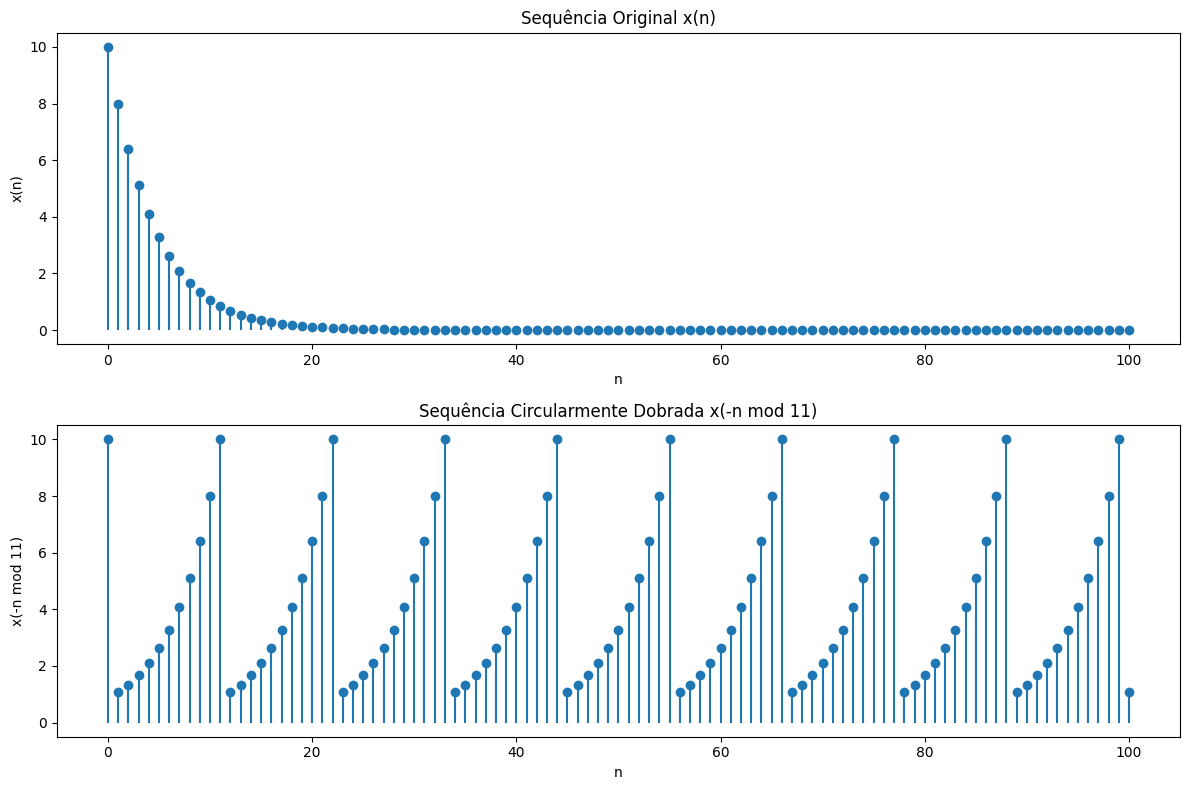

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a sequência original x(n)
n = np.arange(101)  # n de 0 até 100
x = 10 * (0.8) ** n  # Sequência original x(n)

# Sequência dobrada circularmente y(n)
y = x[np.mod(-n, 11)]  # Aplicando a operação circular mod 11

# Plotando o gráfico

plt.figure(figsize=(12, 8))

# Gráfico 1: Sequência original
plt.subplot(2, 1, 1)
plt.stem(n, x, basefmt=" ")
plt.title("Sequência Original x(n)")
plt.xlabel("n")
plt.ylabel("x(n)")

# Gráfico 2: Sequência dobrada circularmente
plt.subplot(2, 1, 2)
plt.stem(n, y, basefmt=" ")
plt.title("Sequência Circularmente Dobrada x(-n mod 11)")
plt.xlabel("n")
plt.ylabel("x(-n mod 11)")

# Exibindo os gráficos
plt.tight_layout()
plt.show()





```
n = 0:100; x = 10*(0.8) .^ n; y = x(mod(-n,11)+1);
subplot(2,1,1); stem(n,x); title("Original sequence")
xlabel("n"); ylabel("x(n)");
subplot(2,1,2); stem(n,y); title("Circularly folded sequence")
xlabel("n"); ylabel("x(-n mod 10)");
```
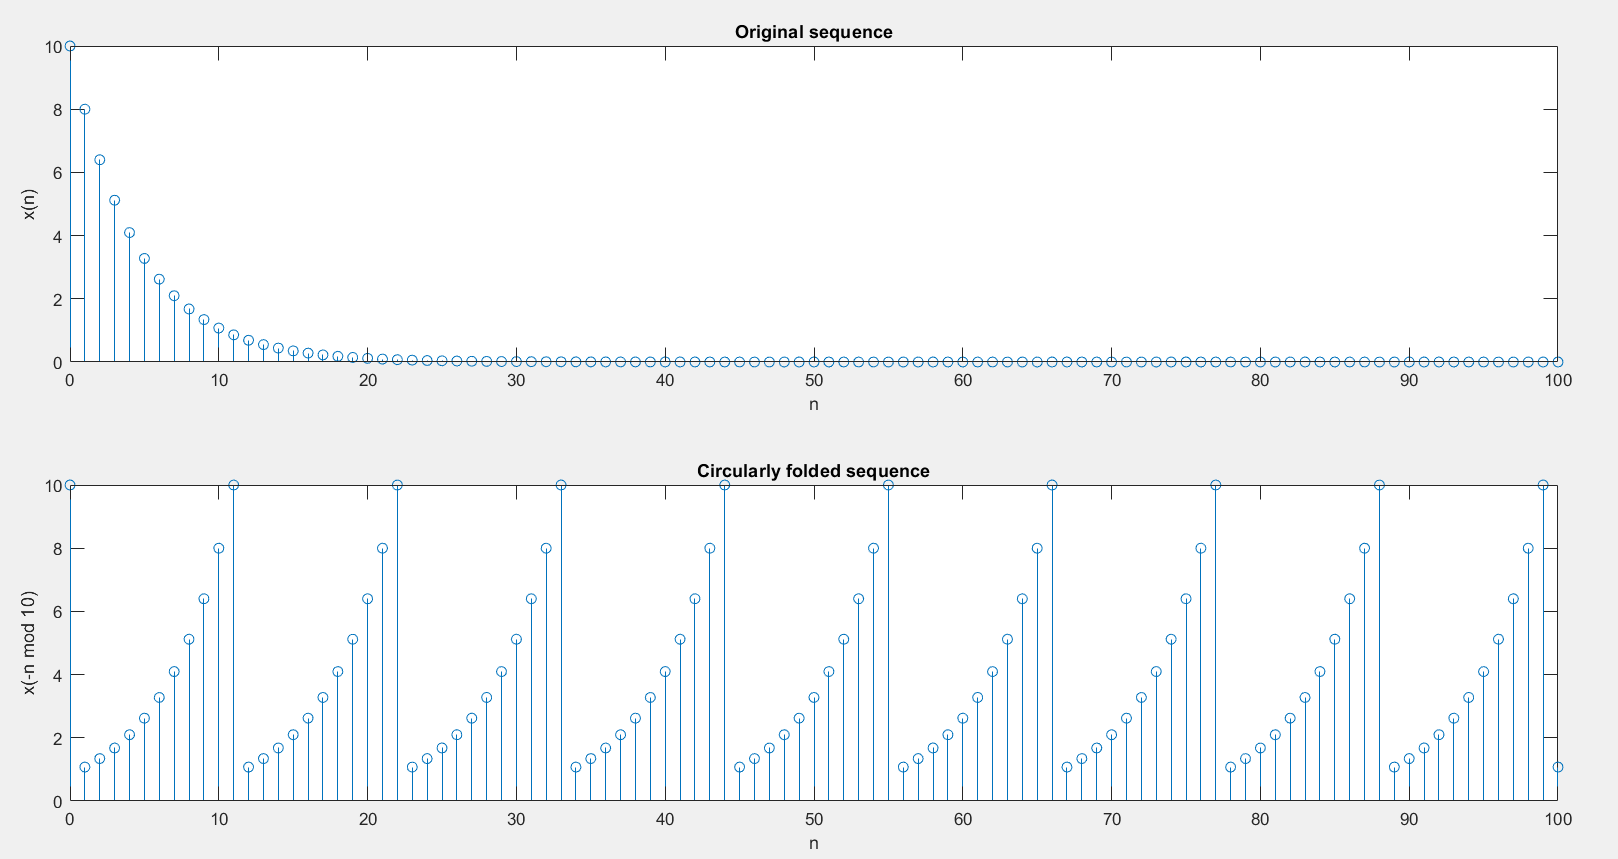


####**SIMULAÇÃO 5.10**


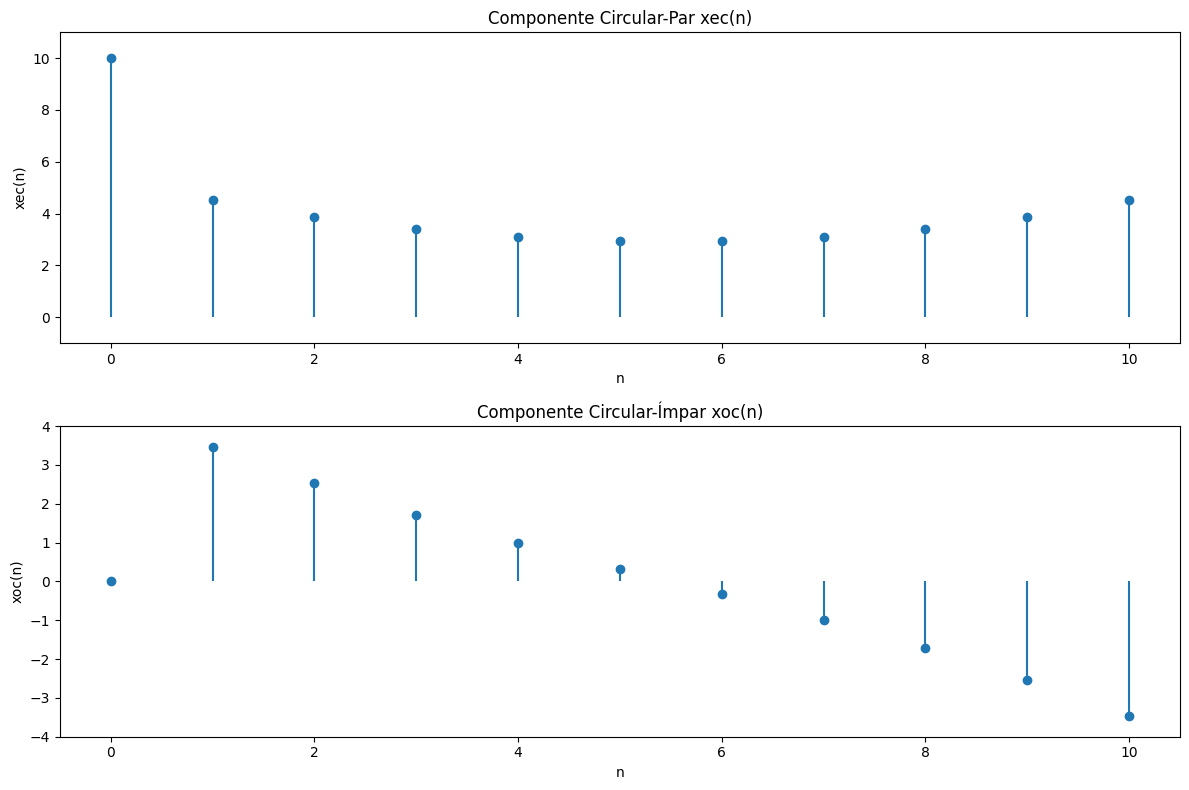

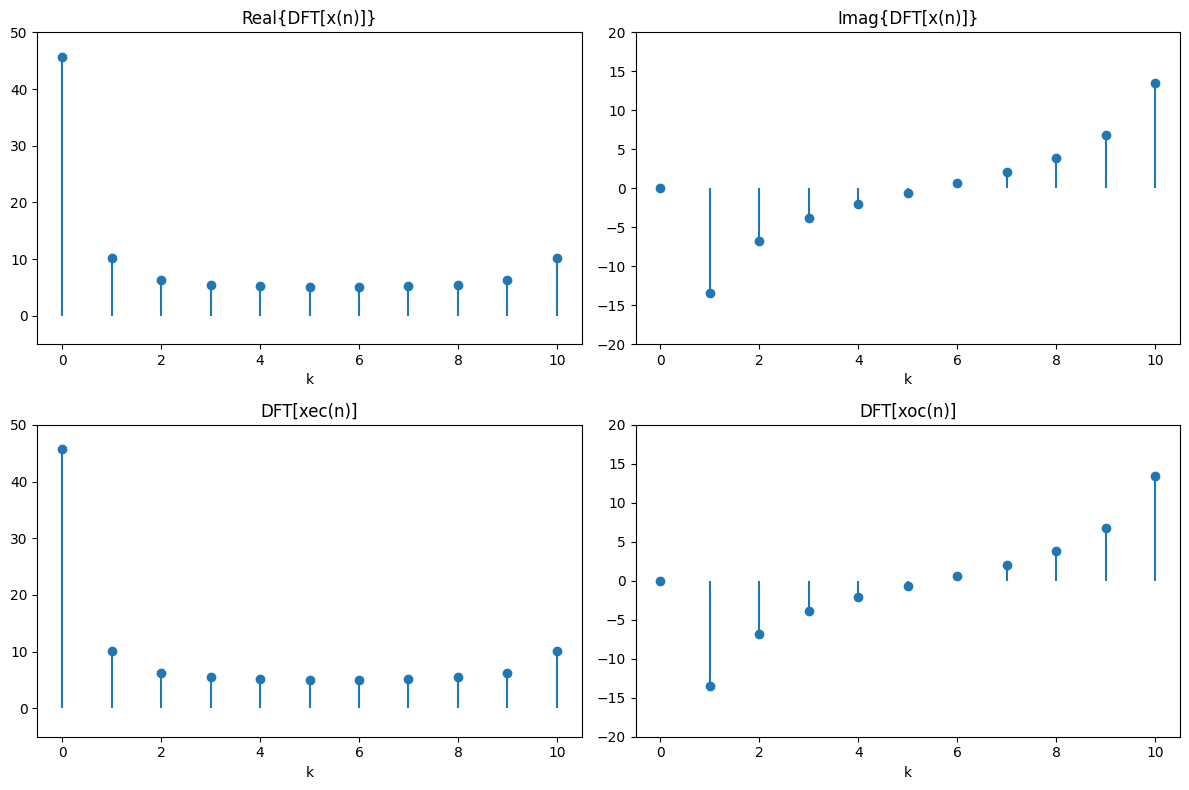

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Função para decompor a sequência em partes circularmente par e ímpar
def circevod(x):
    if np.any(np.iscomplex(x)):
        raise ValueError("x is not a real sequence")

    N = len(x)
    n = np.arange(N)

    # Parte circular-par
    xec = 0.5 * (x + x[np.mod(-n, N)])

    # Parte circular-ímpar
    xoc = 0.5 * (x - x[np.mod(-n, N)])

    return xec, xoc

# Sequência de entrada
n = np.arange(11)
x = 10 * (0.8) ** n

# Decompondo a sequência em partes circular-par e circular-ímpar
xec, xoc = circevod(x)

# Plotando os gráficos
plt.figure(figsize=(12, 8))

# Gráfico 1: Componente circular-par
plt.subplot(2, 1, 1)
plt.stem(n, xec, basefmt=" ")
plt.title("Componente Circular-Par xec(n)")
plt.xlabel("n")
plt.ylabel("xec(n)")
plt.axis([-0.5, 10.5, -1, 11])

# Gráfico 2: Componente circular-ímpar
plt.subplot(2, 1, 2)
plt.stem(n, xoc, basefmt=" ")
plt.title("Componente Circular-Ímpar xoc(n)")
plt.xlabel("n")
plt.ylabel("xoc(n)")
plt.axis([-0.5, 10.5, -4, 4])

# Exibindo os gráficos
plt.tight_layout()
plt.show()

# Função para calcular a DFT
def dft(x, N):
    n = np.arange(N)
    k = np.arange(N)
    WN = np.exp(-2j * np.pi / N)  # Fator de rotação
    nk = np.outer(n, k)
    WNnk = WN ** nk
    Xk = np.dot(x, WNnk)
    return Xk

# Calculando a DFT da sequência original e das partes par e ímpar
X = dft(x, 11)
Xec = dft(xec, 11)
Xoc = dft(xoc, 11)

# Plotando os resultados da DFT
plt.figure(figsize=(12, 8))

# Gráfico 1: Real da DFT de x(n)
plt.subplot(2, 2, 1)
plt.stem(n, np.real(X), basefmt=" ")
plt.title("Real{DFT[x(n)]}")
plt.xlabel("k")
plt.axis([-0.5, 10.5, -5, 50])

# Gráfico 2: Imaginar da DFT de x(n)
plt.subplot(2, 2, 2)
plt.stem(n, np.imag(X), basefmt=" ")
plt.title("Imag{DFT[x(n)]}")
plt.xlabel("k")
plt.axis([-0.5, 10.5, -20, 20])

# Gráfico 3: DFT de xec(n)
plt.subplot(2, 2, 3)
plt.stem(n, np.real(Xec), basefmt=" ")
plt.title("DFT[xec(n)]")
plt.xlabel("k")
plt.axis([-0.5, 10.5, -5, 50])

# Gráfico 4: DFT de xoc(n)
plt.subplot(2, 2, 4)
plt.stem(n, np.imag(Xoc), basefmt=" ")
plt.title("DFT[xoc(n)]")
plt.xlabel("k")
plt.axis([-0.5, 10.5, -20, 20])

# Exibindo os gráficos
plt.tight_layout()
plt.show()


Função civevod:


```
function [xec, xoc] = circevod(x)

% signal decomposition into circular-even and circular-odd parts

% --------------------------------------------------------------

% [xec, xoc] = circecod(x)

%

if any(imag(x) ~= 0)

      error('x is not a real sequence')

end

N = length(x); n = 0:(N-1);

xec = 0.5*(x + x(mod(-n,N)+1));

xoc = 0.5*(x - x(mod(-n,N)+1));
```



```
n = 0:10; x = 10*(0.8) .^ n;
[xec,xoc] = circevod(x);
subplot(2,1,1); stem(n,xec); title("Componente circular-par")
xlabel("n"); ylabel("xec(n)"); axis([-0.5,10.5,-1,11])
subplot(2,1,2); stem(n,xoc); title("Componente circular-ímpar")
xlabel("n"); ylabel("xoc(n)"); axis([-0.5,10.5,-4,4])
```
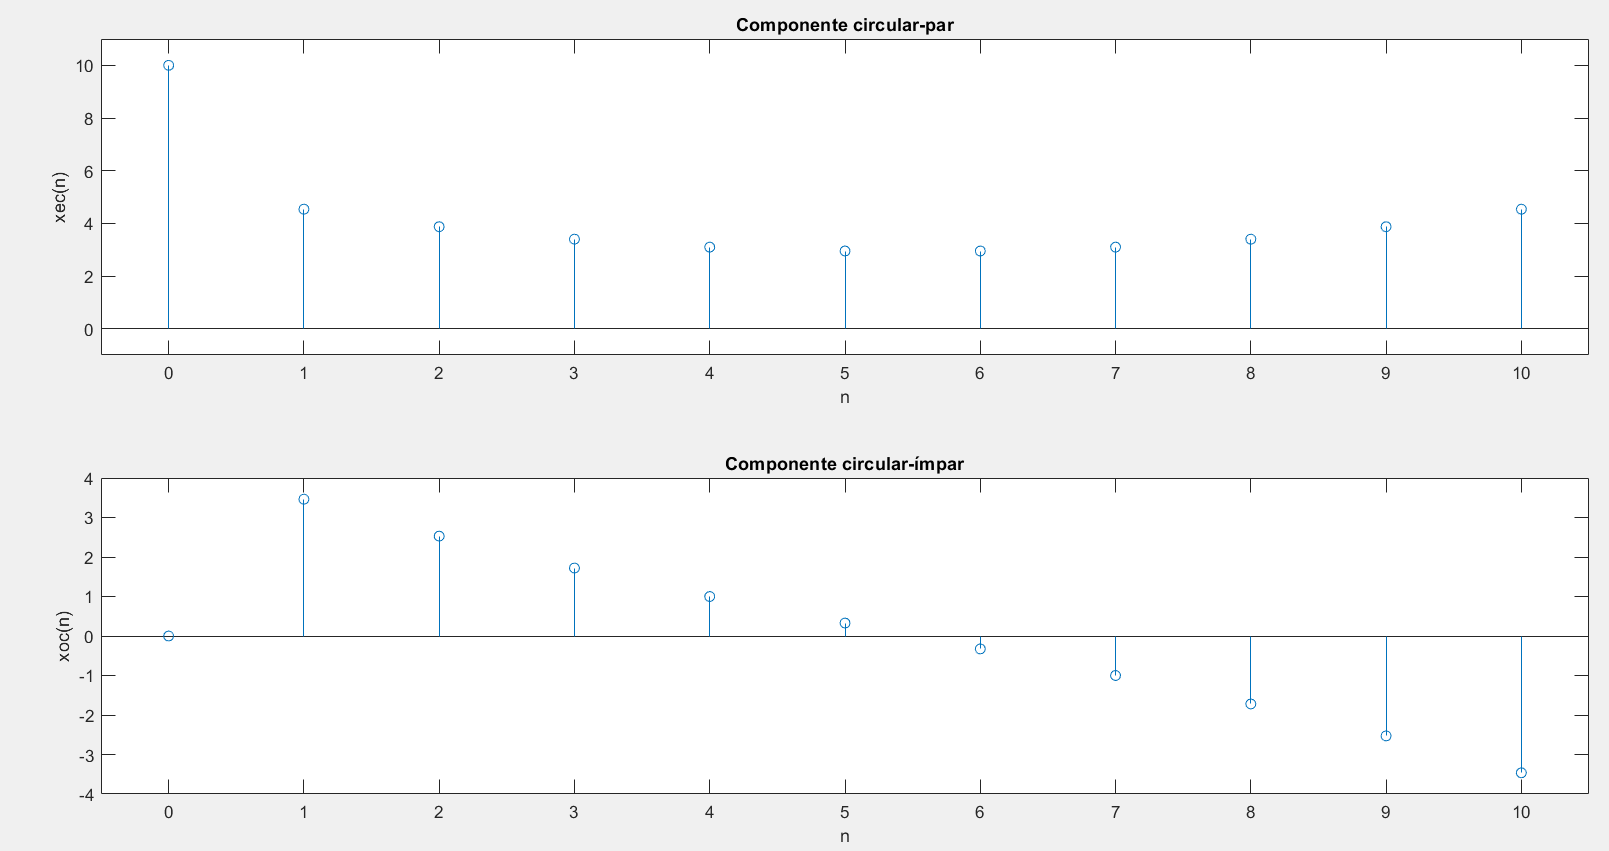




```
X = dft(x,11); Xec = dft(xec,11); Xoc = dft(xoc,11);
subplot(2,2,1); stem(n,real(X)); axis([-0.5,10.5,-5,50])
title("Real{DFT[x(n)]}"); xlabel("k");
subplot(2,2,2); stem(n,imag(X)); axis([-0.5,10.5,-20,20])
title("Imag{DFT[x(n)]}"); xlabel("k");
```
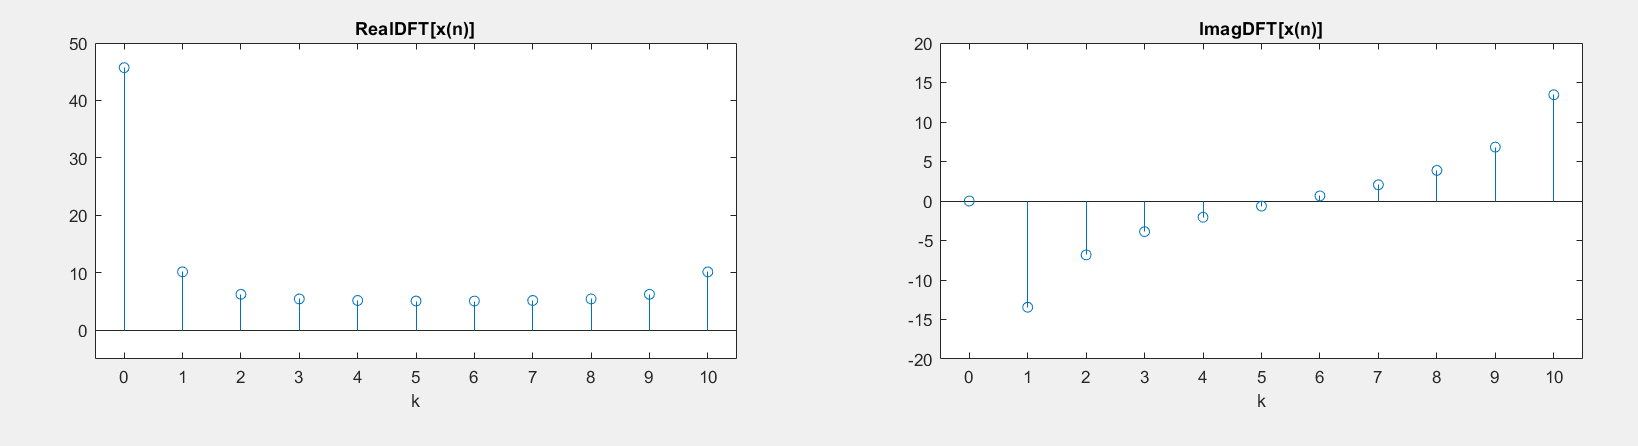



```
subplot(2,2,3); stem(n,real(Xec)); axis([-0.5,10.5,-5,50])
title("DFT[xec(n)]"); xlabel("k");
subplot(2,2,4); stem(n,imag(Xoc)); axis([-0.5,10.5,-20,20])
title("DFT[xoc(n)]"); xlabel("k");
```
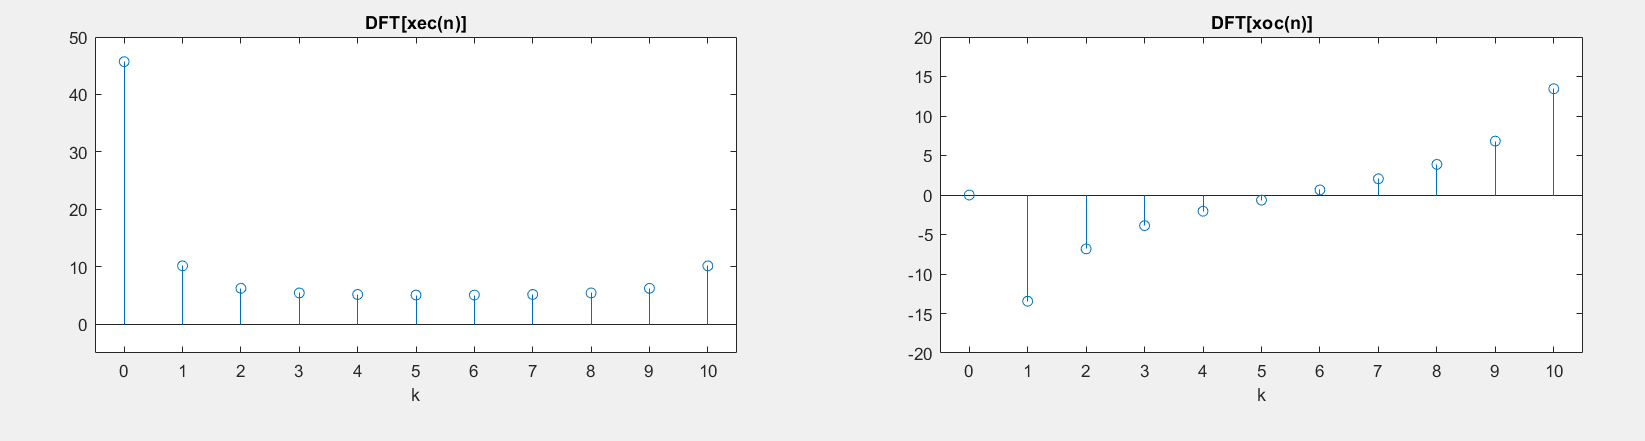



####**SIMULAÇÃO 5.12**


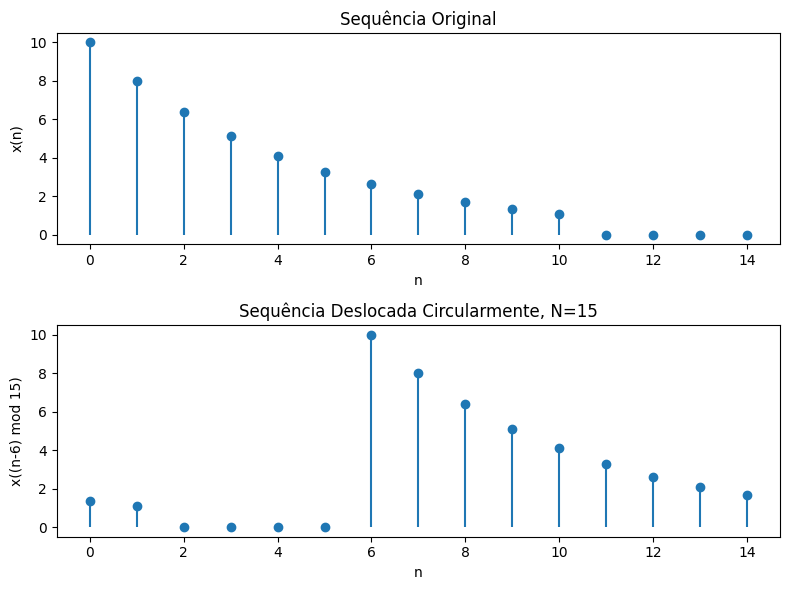

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Função para deslocamento circular
def cirshftt(x, m, N):
    if len(x) > N:
        raise ValueError("N deve ser maior ou igual ao comprimento de x")

    x = np.pad(x, (0, N - len(x)), 'constant')  # Preenche com zeros
    n = np.arange(N)
    n = np.mod(n - m, N)  # Deslocamento circular
    y = x[n]
    return y

# Parâmetros do sinal
n = np.arange(11)
x = 10 * (0.8) ** n
m = 6
N = 15

# Realizando o deslocamento circular
y = cirshftt(x, m, N)

# Ampliando a sequência x para tamanho N
x_expanded = np.concatenate((x, np.zeros(N - len(x))))

# Plotando os gráficos
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Sequência original
axs[0].stem(np.arange(N), x_expanded, basefmt=" ")
axs[0].set_title("Sequência Original")
axs[0].set_xlabel("n")
axs[0].set_ylabel("x(n)")

# Sequência deslocada
axs[1].stem(np.arange(N), y, basefmt=" ")
axs[1].set_title(f"Sequência Deslocada Circularmente, N={N}")
axs[1].set_xlabel("n")
axs[1].set_ylabel(f"x((n-{m}) mod {N})")

plt.tight_layout()
plt.show()


Função cirshftt:



```
function y = cirshftt(x,m,N)

% Circular shift of m samples wrt size N in sequence x: (time domain)

% -------------------------------------------------------------------

% [y] = cirshftt(x,m,N)

% y = output sequence containing the circular shift

% x = input sequence of length <= N

% m = sample shift

% N = size of circular buffer

%  Method: y(n) = x((n-m) mod N)



% Check for length of x

if length(x) > N

        error('N must be >= the length of x')

end

x = [x zeros(1,N-length(x))];

n = [0:1:N-1];

n = mod(n-m,N);

y = x(n+1);
```



```
n = 0:10; x = 10*(0.8) .^ n; y = cirshftt(x,6,15);
n = 0:14; x = [x, zeros(1,4)];
subplot(2,1,1); stem(n,x); title("Sequência original")
xlabel("n"); ylabel("x(n)");
```
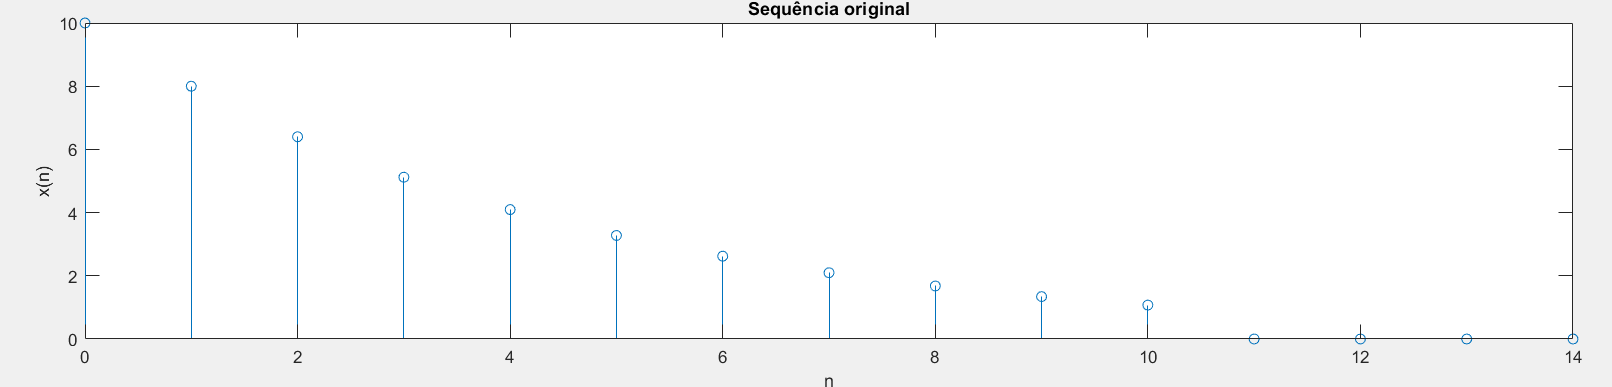



```
subplot(2,1,2); stem(n,y);
title("Sequência deslocada circularmente, N=15")
xlabel("n"); ylabel("x((n-6) mod 15)");
```
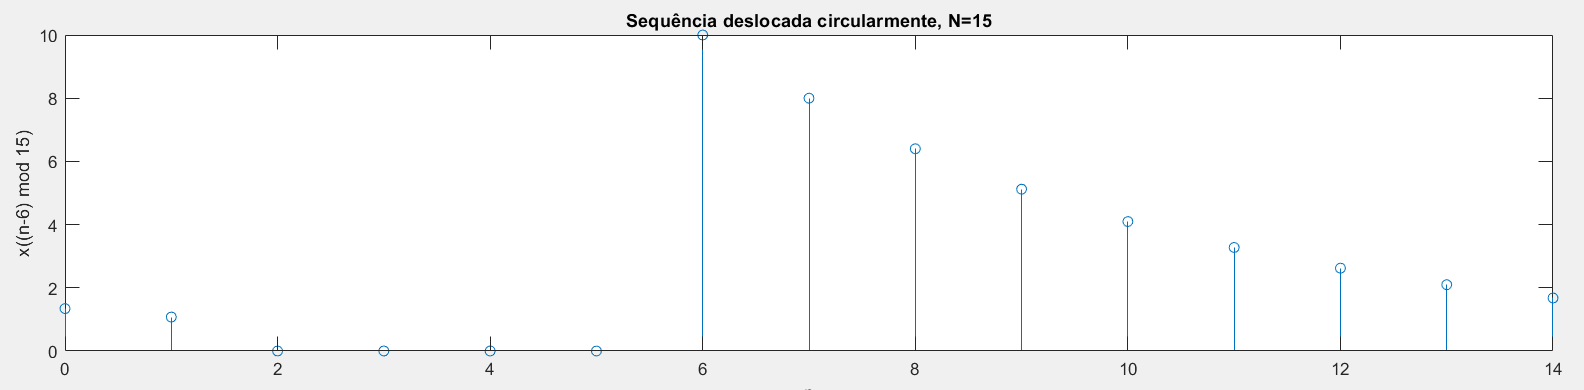


####**SIMULAÇÃO 5.14**


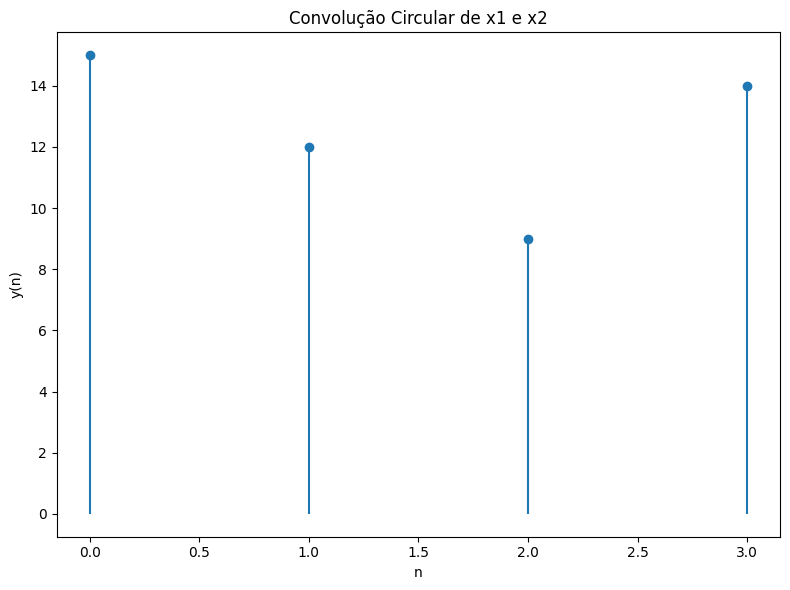

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Função para a convolução circular
def circonvt(x1, x2, N):
    if len(x1) > N or len(x2) > N:
        raise ValueError("N deve ser maior ou igual ao comprimento de x1 e x2")

    # Preenche com zeros até o tamanho N
    x1 = np.pad(x1, (0, N - len(x1)), 'constant')
    x2 = np.pad(x2, (0, N - len(x2)), 'constant')

    # Deslocamento circular de x2
    m = np.arange(N)
    x2 = x2[np.mod(-m, N)]  # Circular shift

    # Matriz H (matriz de deslocamento circular)
    H = np.zeros((N, N))
    for n in range(N):
        H[n, :] = np.roll(x2, n)

    # Convolução circular
    y = np.dot(x1, H.T)

    return y

# Dados de entrada
x1 = np.array([1, 2, 2])
x2 = np.array([1, 2, 3, 4])
N = 4

# Calculando a convolução circular
y = circonvt(x1, x2, N)

# Plotando os gráficos
plt.figure(figsize=(8, 6))

# Gráfico de y
plt.stem(np.arange(N), y, basefmt=" ")
plt.title("Convolução Circular de x1 e x2")
plt.xlabel("n")
plt.ylabel("y(n)")

plt.tight_layout()
plt.show()


Função circonvt:


```
function y = circonvt(x1,x2,N)

% N-point circular convolution between x1 and x2: (time-domain)

% -------------------------------------------------------------

% [y] = circonvt(x1,x2,N)

%  y = output sequence containing the circular convolution

% x1 = input sequence of length N1 <= N

% x2 = input sequence of length N2 <= N

%  N = size of circular buffer

%  Method: y(n) = sum (x1(m)*x2((n-m) mod N))

% Check for length of x1

if length(x1) > N

        error('N must be >= the length of x1')

end



% Check for length of x2

if length(x2) > N

        error('N must be >= the length of x2')

end


x1=[x1 zeros(1,N-length(x1))];

x2=[x2 zeros(1,N-length(x2))];


m = [0:1:N-1];

x2 = x2(mod(-m,N)+1);

H = zeros(N,N);

for n = 1:1:N

	H(n,:) = cirshftt(x2,n-1,N);

end

y = x1*H';
```



```
x1 = [1,2,2]; x2 = [1,2,3,4]; y = circonvt(x1, x2, 4)
y =

    15    12     9    14
```



####**SIMULAÇÃO 5.15**


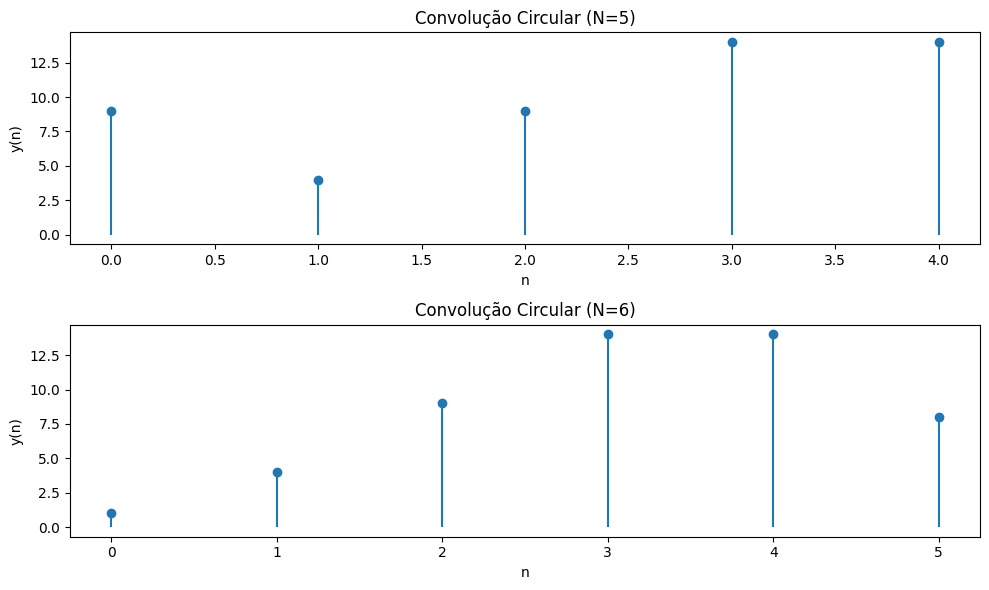

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Função para convolução circular
def circonvt(x1, x2, N):
    # Completar com zeros se necessário
    x1 = np.pad(x1, (0, N - len(x1)), 'constant')
    x2 = np.pad(x2, (0, N - len(x2)), 'constant')

    # Inicializar a matriz de convolução
    y = np.zeros(N)

    # Calculando a convolução circular
    for n in range(N):
        for m in range(N):
            y[n] += x1[m] * x2[(n - m) % N]

    return y

# Exemplo 1
x1 = [1, 2, 2]
x2 = [1, 2, 3, 4]
N = 5
y = circonvt(x1, x2, N)

# Gráfico para o primeiro exemplo
plt.figure(figsize=(10, 6))

# Gráfico da convolução circular
plt.subplot(2, 1, 1)
plt.stem(range(N), y, basefmt=" ")
plt.title(f"Convolução Circular (N={N})")
plt.xlabel("n")
plt.ylabel("y(n)")

# Exemplo 2
N2 = 6
y2 = circonvt(x1, x2, N2)

# Gráfico para o segundo exemplo
plt.subplot(2, 1, 2)
plt.stem(range(N2), y2, basefmt=" ")
plt.title(f"Convolução Circular (N={N2})")
plt.xlabel("n")
plt.ylabel("y(n)")

# Exibir os gráficos
plt.tight_layout()
plt.show()




```
x1 = [1,2,2]; x2 = [1,2,3,4]; y = circonvt(x1, x2, 5)
y =

     9     4     9    14    14

```






```
x1 = [1,2,2]; x2 = [1,2,3,4]; y = circonvt(x1, x2, 6)
y =

     1     4     9    14    14     8
```



####**SIMULAÇÃO 5.16**


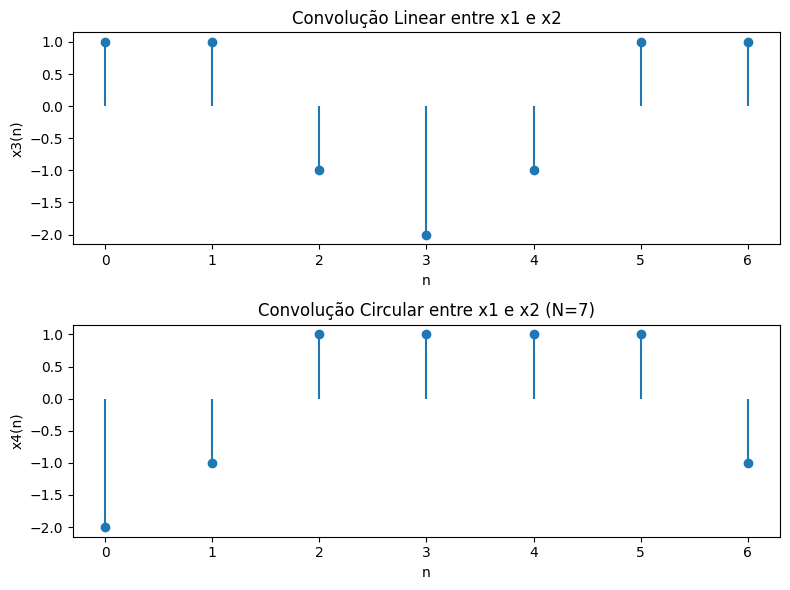

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Função para convolução linear
def conv(x1, x2):
    return np.convolve(x1, x2, 'full')

# Função para convolução circular
def circonvt(x1, x2, N):
    x1 = np.pad(x1, (0, N - len(x1)), 'constant')
    x2 = np.pad(x2, (0, N - len(x2)), 'constant')

    m = np.arange(N)
    x2_shifted = np.array([np.roll(x2, n) for n in range(N)])
    y = np.dot(x1, x2_shifted.T)  # Produto escalar
    return y

# Sequências
x1 = np.array([1, 2, 2, 1])
x2 = np.array([1, -1, -1, 1])

# Convolução linear
x3 = conv(x1, x2)

# Convolução circular
x4 = circonvt(x1, x2, 7)

# Plotando os gráficos
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Gráfico da convolução linear
axs[0].stem(range(len(x3)), x3, basefmt=" ")
axs[0].set_title("Convolução Linear entre x1 e x2")
axs[0].set_xlabel("n")
axs[0].set_ylabel("x3(n)")

# Gráfico da convolução circular
axs[1].stem(range(len(x4)), x4, basefmt=" ")
axs[1].set_title("Convolução Circular entre x1 e x2 (N=7)")
axs[1].set_xlabel("n")
axs[1].set_ylabel("x4(n)")

plt.tight_layout()
plt.show()




```
x1 = [1,2,2,1]; x2 = [1,-1,-1,1]; x3 = conv(x1,x2)
x3 =

     1     1    -1    -2    -1     1     1
```





```
x4 = circonvt(x1,x2,7)
x4 =

     1     1    -1    -2    -1     1     1
```



####**SIMULAÇÃO 5.19**


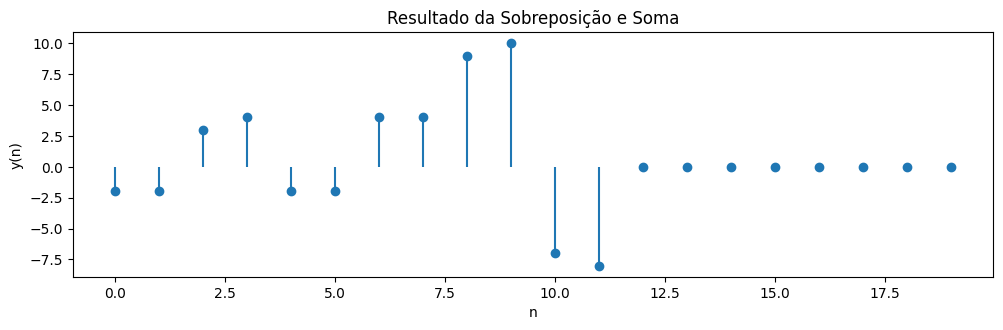

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Função para a convolução circular
def circonvt(x1, x2, N):
    # Preenche com zeros até o tamanho N
    x1 = np.pad(x1, (0, N - len(x1)), mode='constant')
    x2 = np.pad(x2, (0, N - len(x2)), mode='constant')

    # Convolução circular
    y = np.zeros(N)
    for n in range(N):
        y[n] = np.sum(x1 * np.roll(x2, n))  # Realiza a convolução circular
    return y

# Função de sobreposição e soma (Overlap-save)
def ovrlpsav(x, h, N):
    M = len(h)
    M1 = M - 1
    L = N - M1

    x = np.concatenate((np.zeros(M1), x, np.zeros(N-1)))  # Prepend zeros
    Lenx = len(x)

    K = (Lenx + M1 - 1) // L  # Número de blocos
    Y = np.zeros((K + 1, N))

    for k in range(K):
        xk = x[k * L: k * L + N]
        Y[k, :] = circonvt(xk, h, N)

    Y = Y[:, M - 1: N]  # Descarta os primeiros M-1 samples
    y = Y.flatten()  # Junta os resultados em um vetor

    return y

# Definindo os sinais de entrada
n = np.arange(10)
x = n + 1
h = np.array([1, 0, -1])
N = 6

# Aplicando a função de sobreposição e soma
y = ovrlpsav(x, h, N)

# Plotando os resultados
plt.figure(figsize=(10, 6))

# Gráfico de y
plt.subplot(2, 1, 1)
plt.stem(np.arange(len(y)), y, basefmt=" ")
plt.title("Resultado da Sobreposição e Soma")
plt.xlabel("n")
plt.ylabel("y(n)")

# Mostrando o gráfico
plt.tight_layout()
plt.show()


Função ovrlpsav:


```
M1 = M-1; L = N-M1;

h = [h zeros(1,N-M)];
%
x = [zeros(1,M1), x, zeros(1,N-1)]; % preappend (M-1) zeros
K = floor((Lenx+M1-1)/(L));         % # of blocks
Y = zeros(K+1,N);
% convolution with succesive blocks
for k=0:K
	xk = x(k*L+1:k*L+N);
	Y(k+1,:) = circonvt(xk,h,N);
end

Y = Y(:,M:N)';                      % discard the first (M-1) samples

y = (Y(:))';                        % assemble output
```



```
n = 0:9; x = n+1; h = [1,0,-1]; N = 6; y = ovrlpsav(x,h,N)
y =

  Columns 1 through 10

     1     2     2     2     2     2     2     2     2     2

  Columns 11 through 12

    -9   -10
```



####**SIMULAÇÃO 5.22**


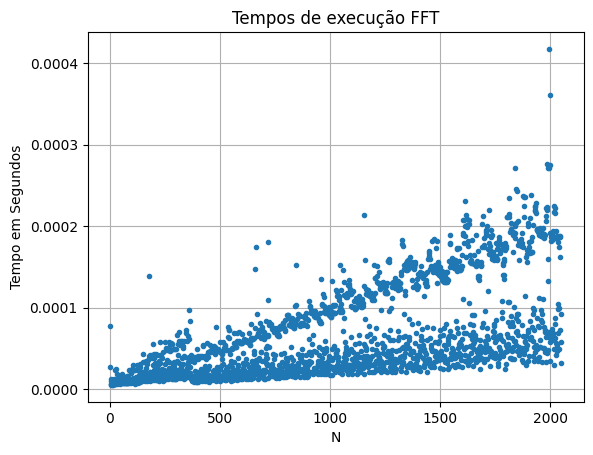

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Parâmetros
Nmax = 2048
fft_time = np.zeros(Nmax)

# Loop para calcular o tempo de execução do FFT para diferentes tamanhos de entrada
for n in range(1, Nmax + 1):
    x = np.random.rand(n)  # Sequência aleatória de tamanho n
    start_time = time.time()  # Inicia o cronômetro
    np.fft.fft(x)  # Calcula a FFT
    fft_time[n - 1] = time.time() - start_time  # Calcula o tempo de execução

# Plotando os resultados
n_values = np.arange(1, Nmax + 1)
plt.plot(n_values, fft_time, '.')
plt.xlabel("N")
plt.ylabel("Tempo em Segundos")
plt.title("Tempos de execução FFT")
plt.grid(True)
plt.show()




```
Nmax = 2048; fft_time=zeros(1,Nmax);
for n=1:1:Nmax
x=rand(1,n);
t=clock;fft(x);fft_time(n)=etime(clock,t);
end
n=[1:1:Nmax]; plot(n,fft_time,".")
xlabel("N");ylabel("Tempo em Seg.")
title("Tempos de execução FFT")
```

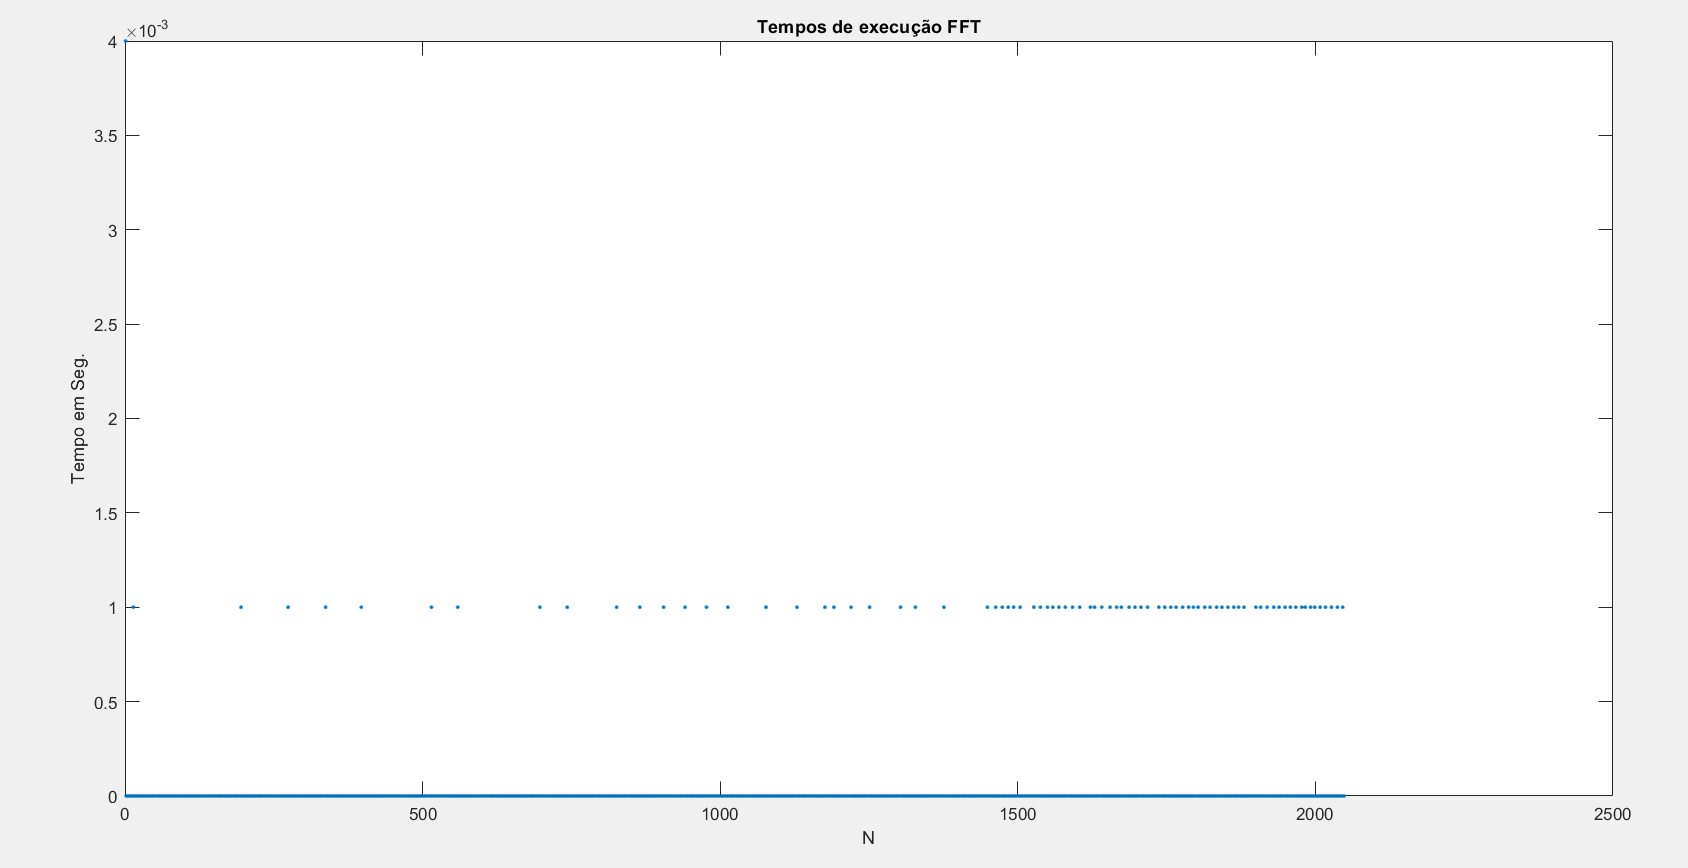

####**SIMULAÇÃO 5.23**

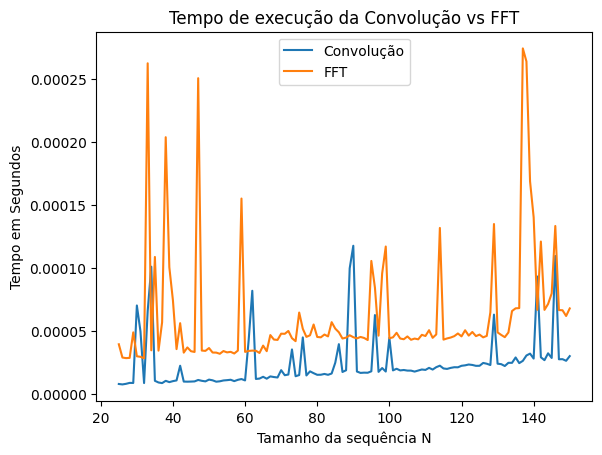

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Inicialização de arrays
conv_time = np.zeros(150)
fft_time = np.zeros(150)

# Loop para calcular o tempo de execução da convolução e FFT
for N in range(1, 151):
    tc = 0
    tf = 0
    L = 2 * N - 1
    nu = round(np.log10(L) / np.log10(2) + 0.45)
    L = 2**nu

    # Loop interno para média de tempos
    for I in range(100):
        h = np.random.randn(N)
        x = np.random.rand(N)

        # Tempo de execução da convolução
        t0 = time.time()
        y1 = np.convolve(h, x, mode='full')
        t1 = time.time() - t0
        tc += t1

        # Tempo de execução da FFT
        t0 = time.time()
        y2 = np.fft.ifft(np.fft.fft(h, L) * np.fft.fft(x, L))
        t2 = time.time() - t0
        tf += t2

    # Calculando a média dos tempos
    conv_time[N - 1] = tc / 100
    fft_time[N - 1] = tf / 100

# Plotando os gráficos
n = np.arange(1, 151)
plt.plot(n[24:], conv_time[24:], label='Convolução')
plt.plot(n[24:], fft_time[24:], label='FFT')
plt.xlabel('Tamanho da sequência N')
plt.ylabel('Tempo em Segundos')
plt.title('Tempo de execução da Convolução vs FFT')
plt.legend()
plt.show()



```
%
conv_time = zeros(1,150); fft_time = zeros(1,150);
%
for N = 1:150
tc = 0; tf=0;
L = 2*N-1; nu = round((log10(L)/log10(2))+0.45); L = 2^nu;
for I=1:100
h = randn(1,N);
x = rand(1,N);
t0 = clock; y1 = conv(h,x); t1=etime(clock,t0);
tc = tc+t1;
t0 = clock; y2 = ifft(fft(h,L).*fft(x,L)); t2=etime(clock,t0);
tf = tf+t2;
end
conv_time(N)=tc/100;
fft_time(N)=tf/100;
end
n = 1:150; subplot(1,1,1);
plot(n(25:150),conv_time(25:150),n(25:150),fft_time(25:150))
```

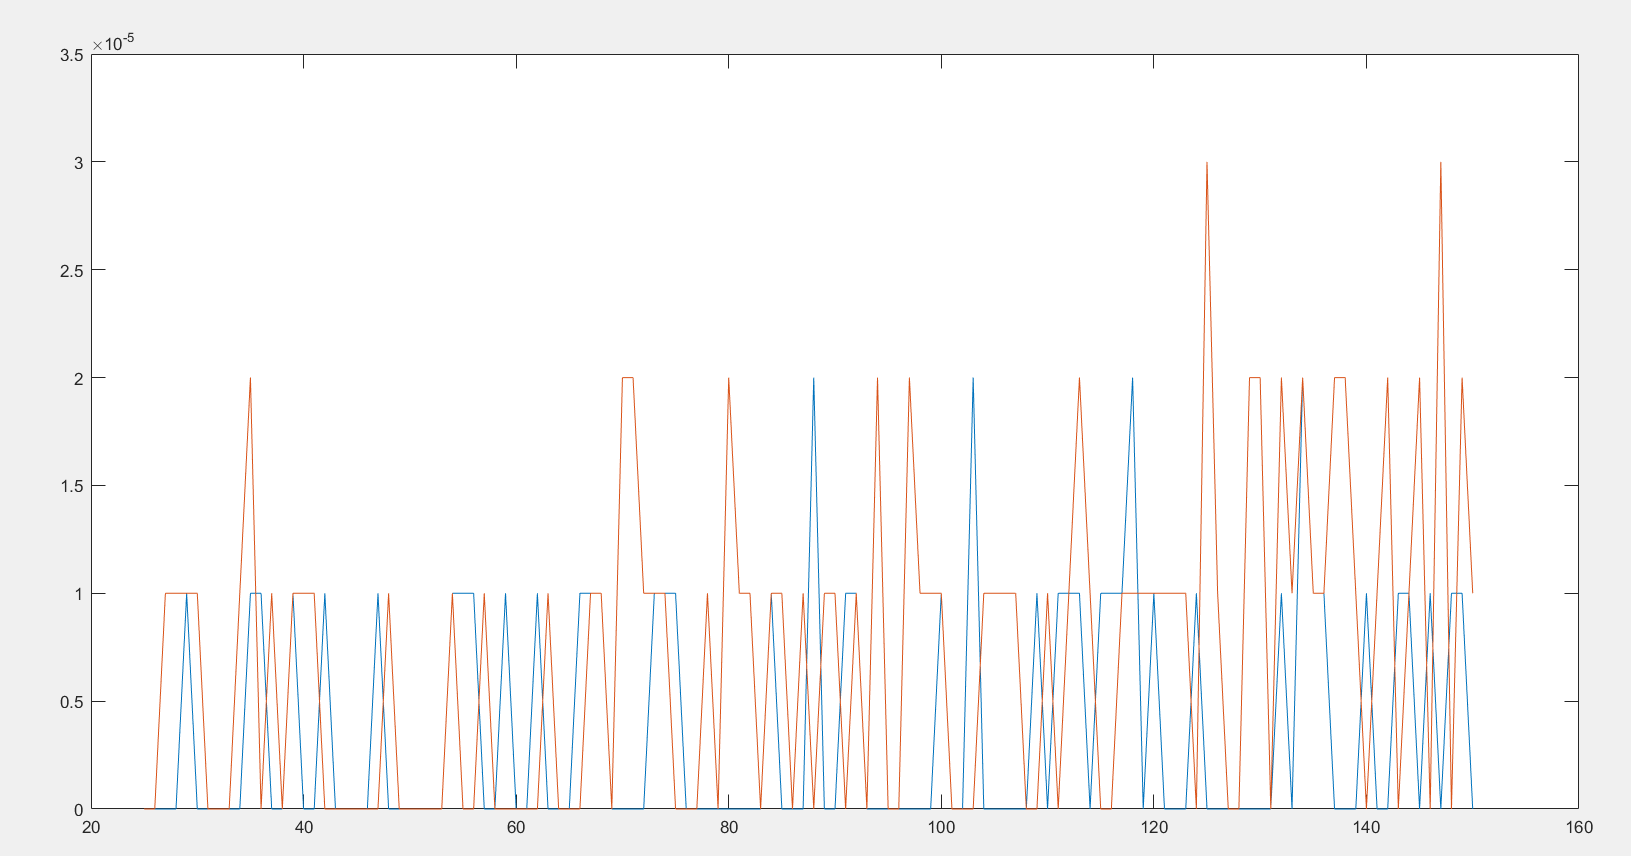